In [44]:
import os
import sys

import numpy as np
from nipype import config
import matplotlib.pyplot as plt # plotting
from matplotlib import pyplot # plotting
from pandas import read_csv # plotting
from nilearn import image, plotting # plotting
#from tqdm.notebook import tqdm

from os.path import pardir
sys.path.append(pardir)
from ica_wf import make_subject_ica_wf

In [ ]:
config.enable_debug_mode()

### Run preproc + ICA workflow

In [ ]:
# create workflow
melodicwf = make_subject_ica_wf()

In [8]:
# hardcoded paths
bold_file = '/LOCAL/jzerbe/faces_vs_houses/derivatives/fmriprep/sub-08/func/sub-08_task-effort_space-T1w_desc-preproc_bold.nii.gz'
mask_file = '/LOCAL/jzerbe/faces_vs_houses/derivatives/fmriprep/sub-08/func/sub-08_task-effort_space-T1w_desc-brain_mask.nii.gz'
out_dir = '/LOCAL/jzerbe/temp_results/melodic/sub-08_task-effort_space-T1w_melodic'

# parameter
p_tr = 1.5
p_hpf_sec =120.0
p_hpf = float(p_hpf_sec/p_tr)
p_fwhm = 4.0
base_dir = '/LOCAL/jzerbe/temp_results'

In [9]:
# feed input to workflow & run
melodicwf.inputs.inputspec.bold_file = bold_file
melodicwf.inputs.inputspec.mask_file = mask_file
melodicwf.inputs.inputspec.hpf = p_hpf
melodicwf.inputs.inputspec.tr = p_tr
melodicwf.inputs.inputspec.fwhm = p_fwhm
melodicwf.inputs.inputspec.out_dir = out_dir
melodicwf.base_dir = base_dir

melodicwf.run()

### Plotting results

In [34]:
# hardcoded paths
melodicimg = '/LOCAL/jzerbe/temp_results/melodic/sub-08_task-effort_space-T1w_melodic/melodic_IC.nii.gz'
anatimg = '/LOCAL/jzerbe/faces_vs_houses/derivatives/fmriprep/sub-08/anat/sub-08_desc-preproc_T1w.nii.gz'
ic_file = '/LOCAL/jzerbe/temp_results/melodic/sub-08_task-effort_space-T1w_melodic/melodic_ICstats.txt'

# plot statistical map slices
print(image.load_img(melodicimg).shape) # (,,,volumes)
volume = image.index_img(melodicimg, 0)
img_ortho = plotting.plot_stat_map(volume, bg_img=anatimg, display_mode='ortho')
plt.show()

(42, 52, 39, 117)



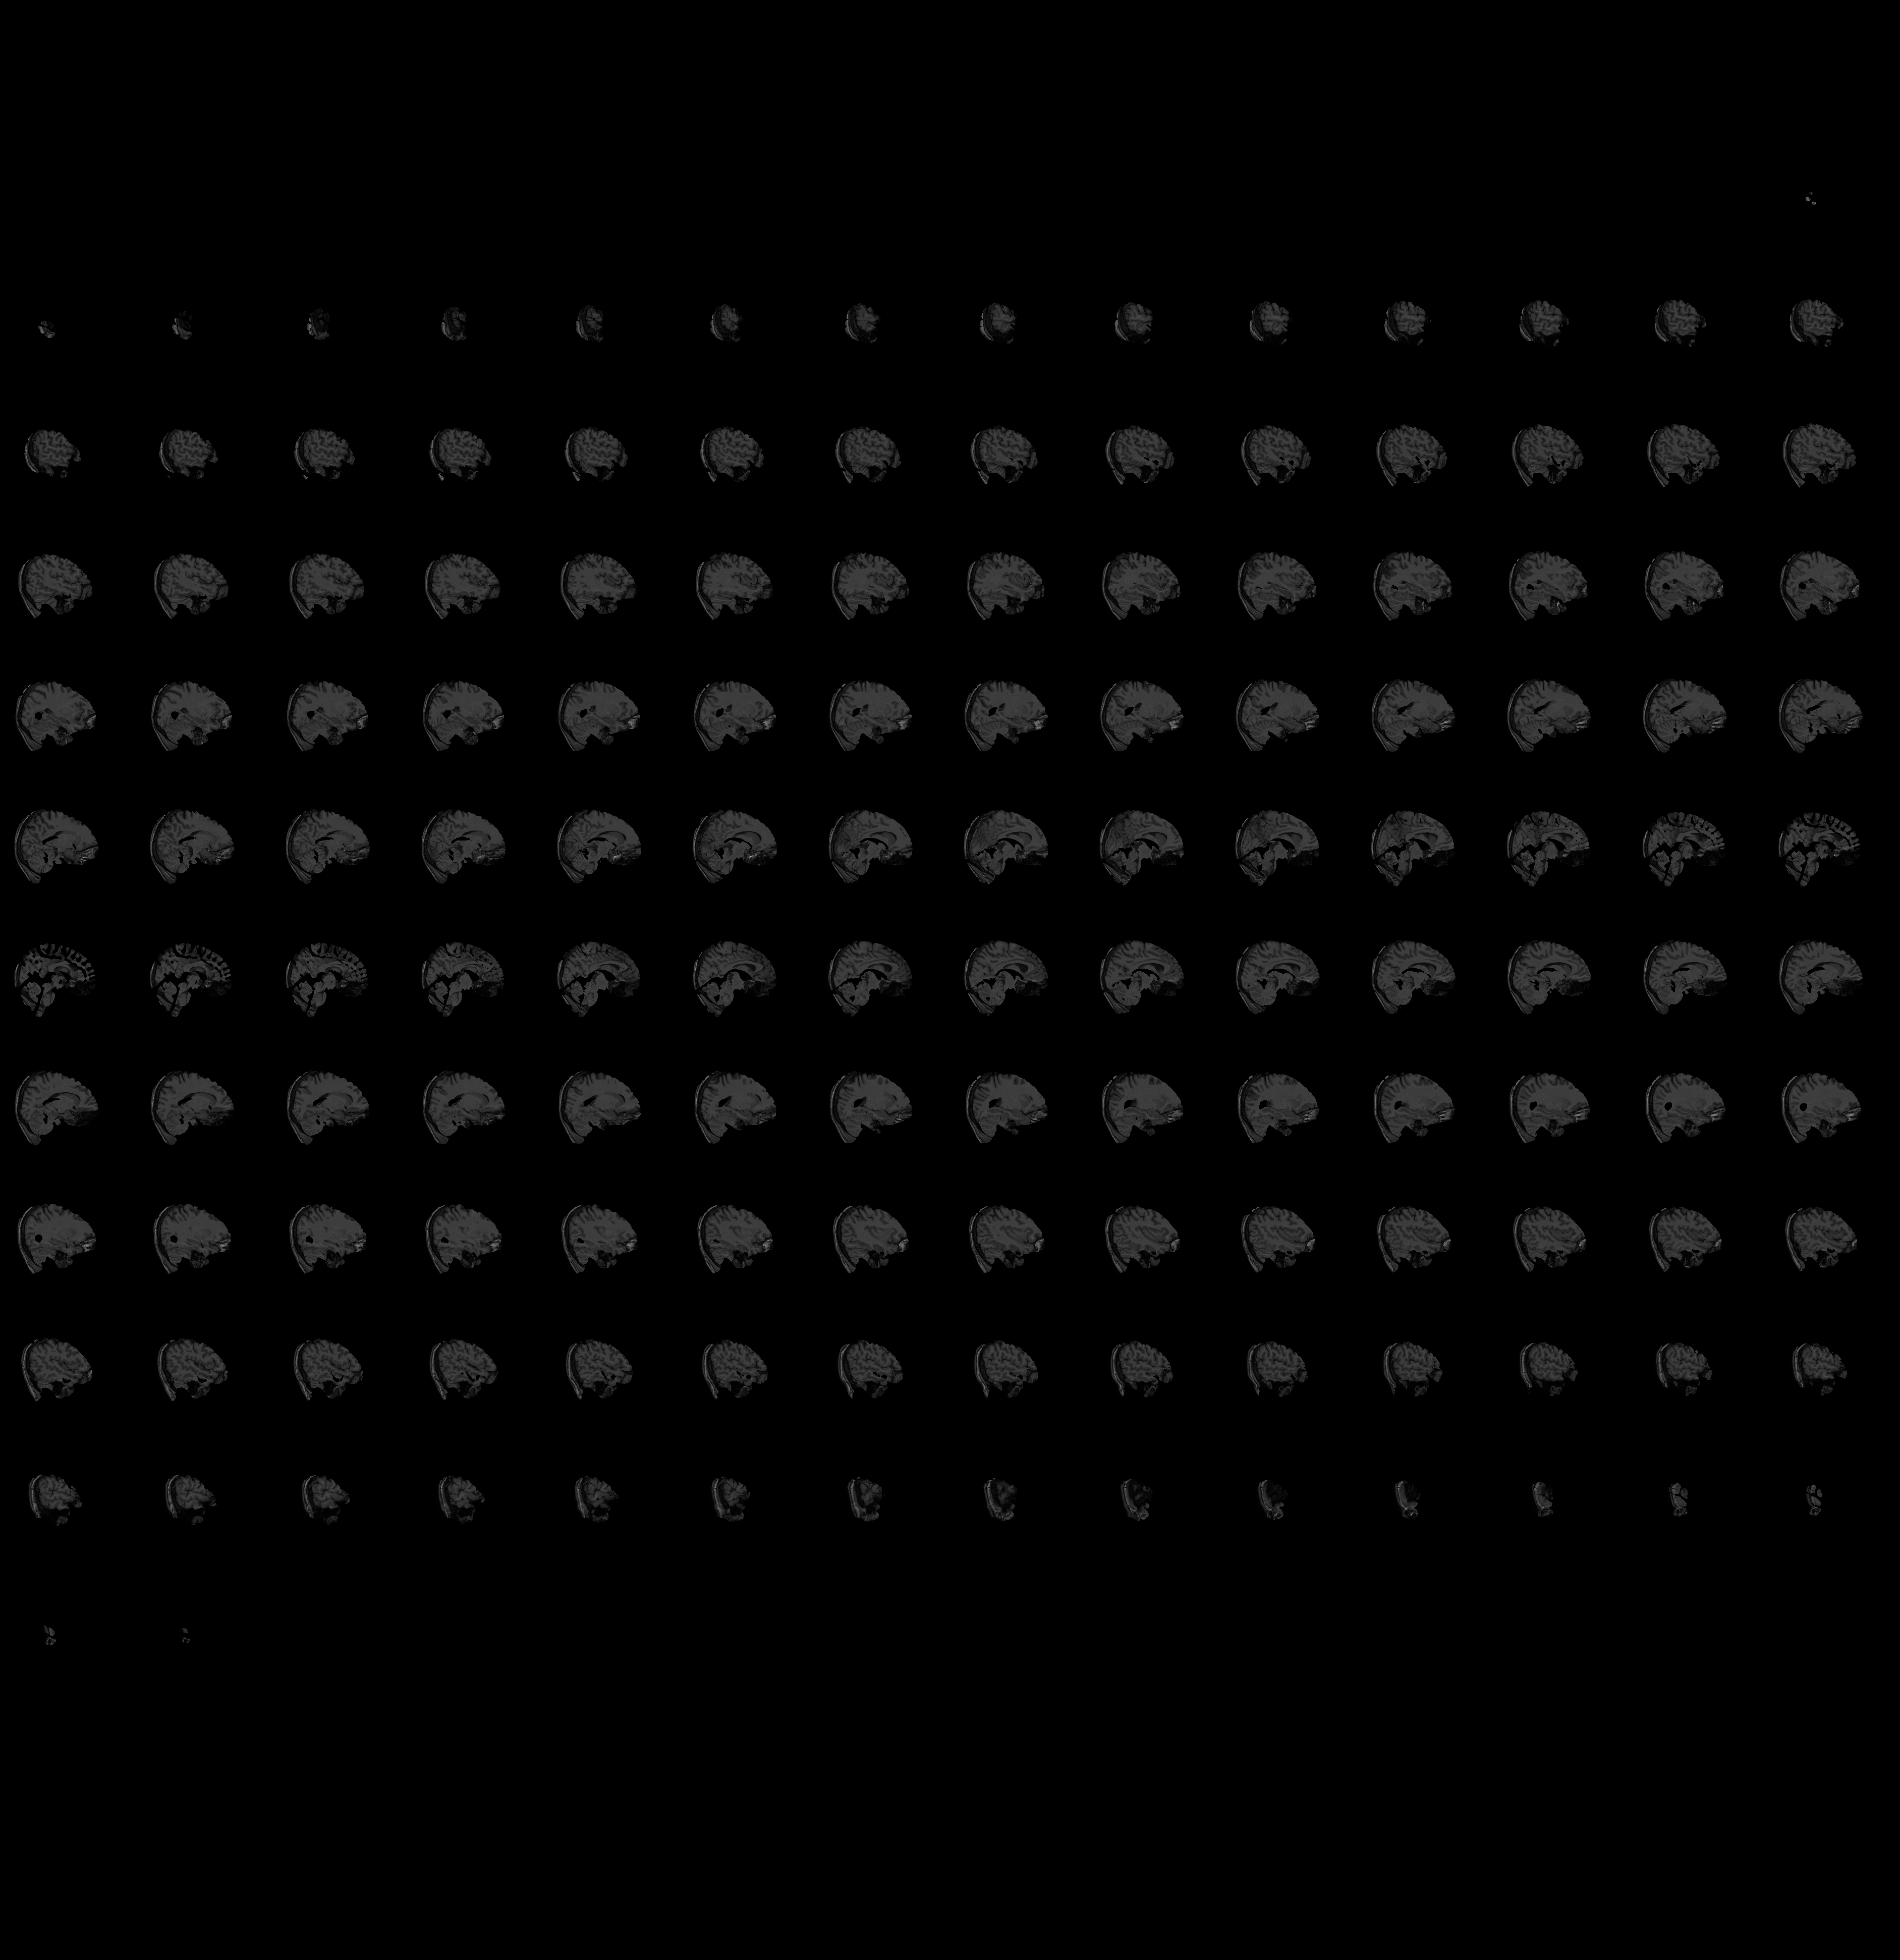
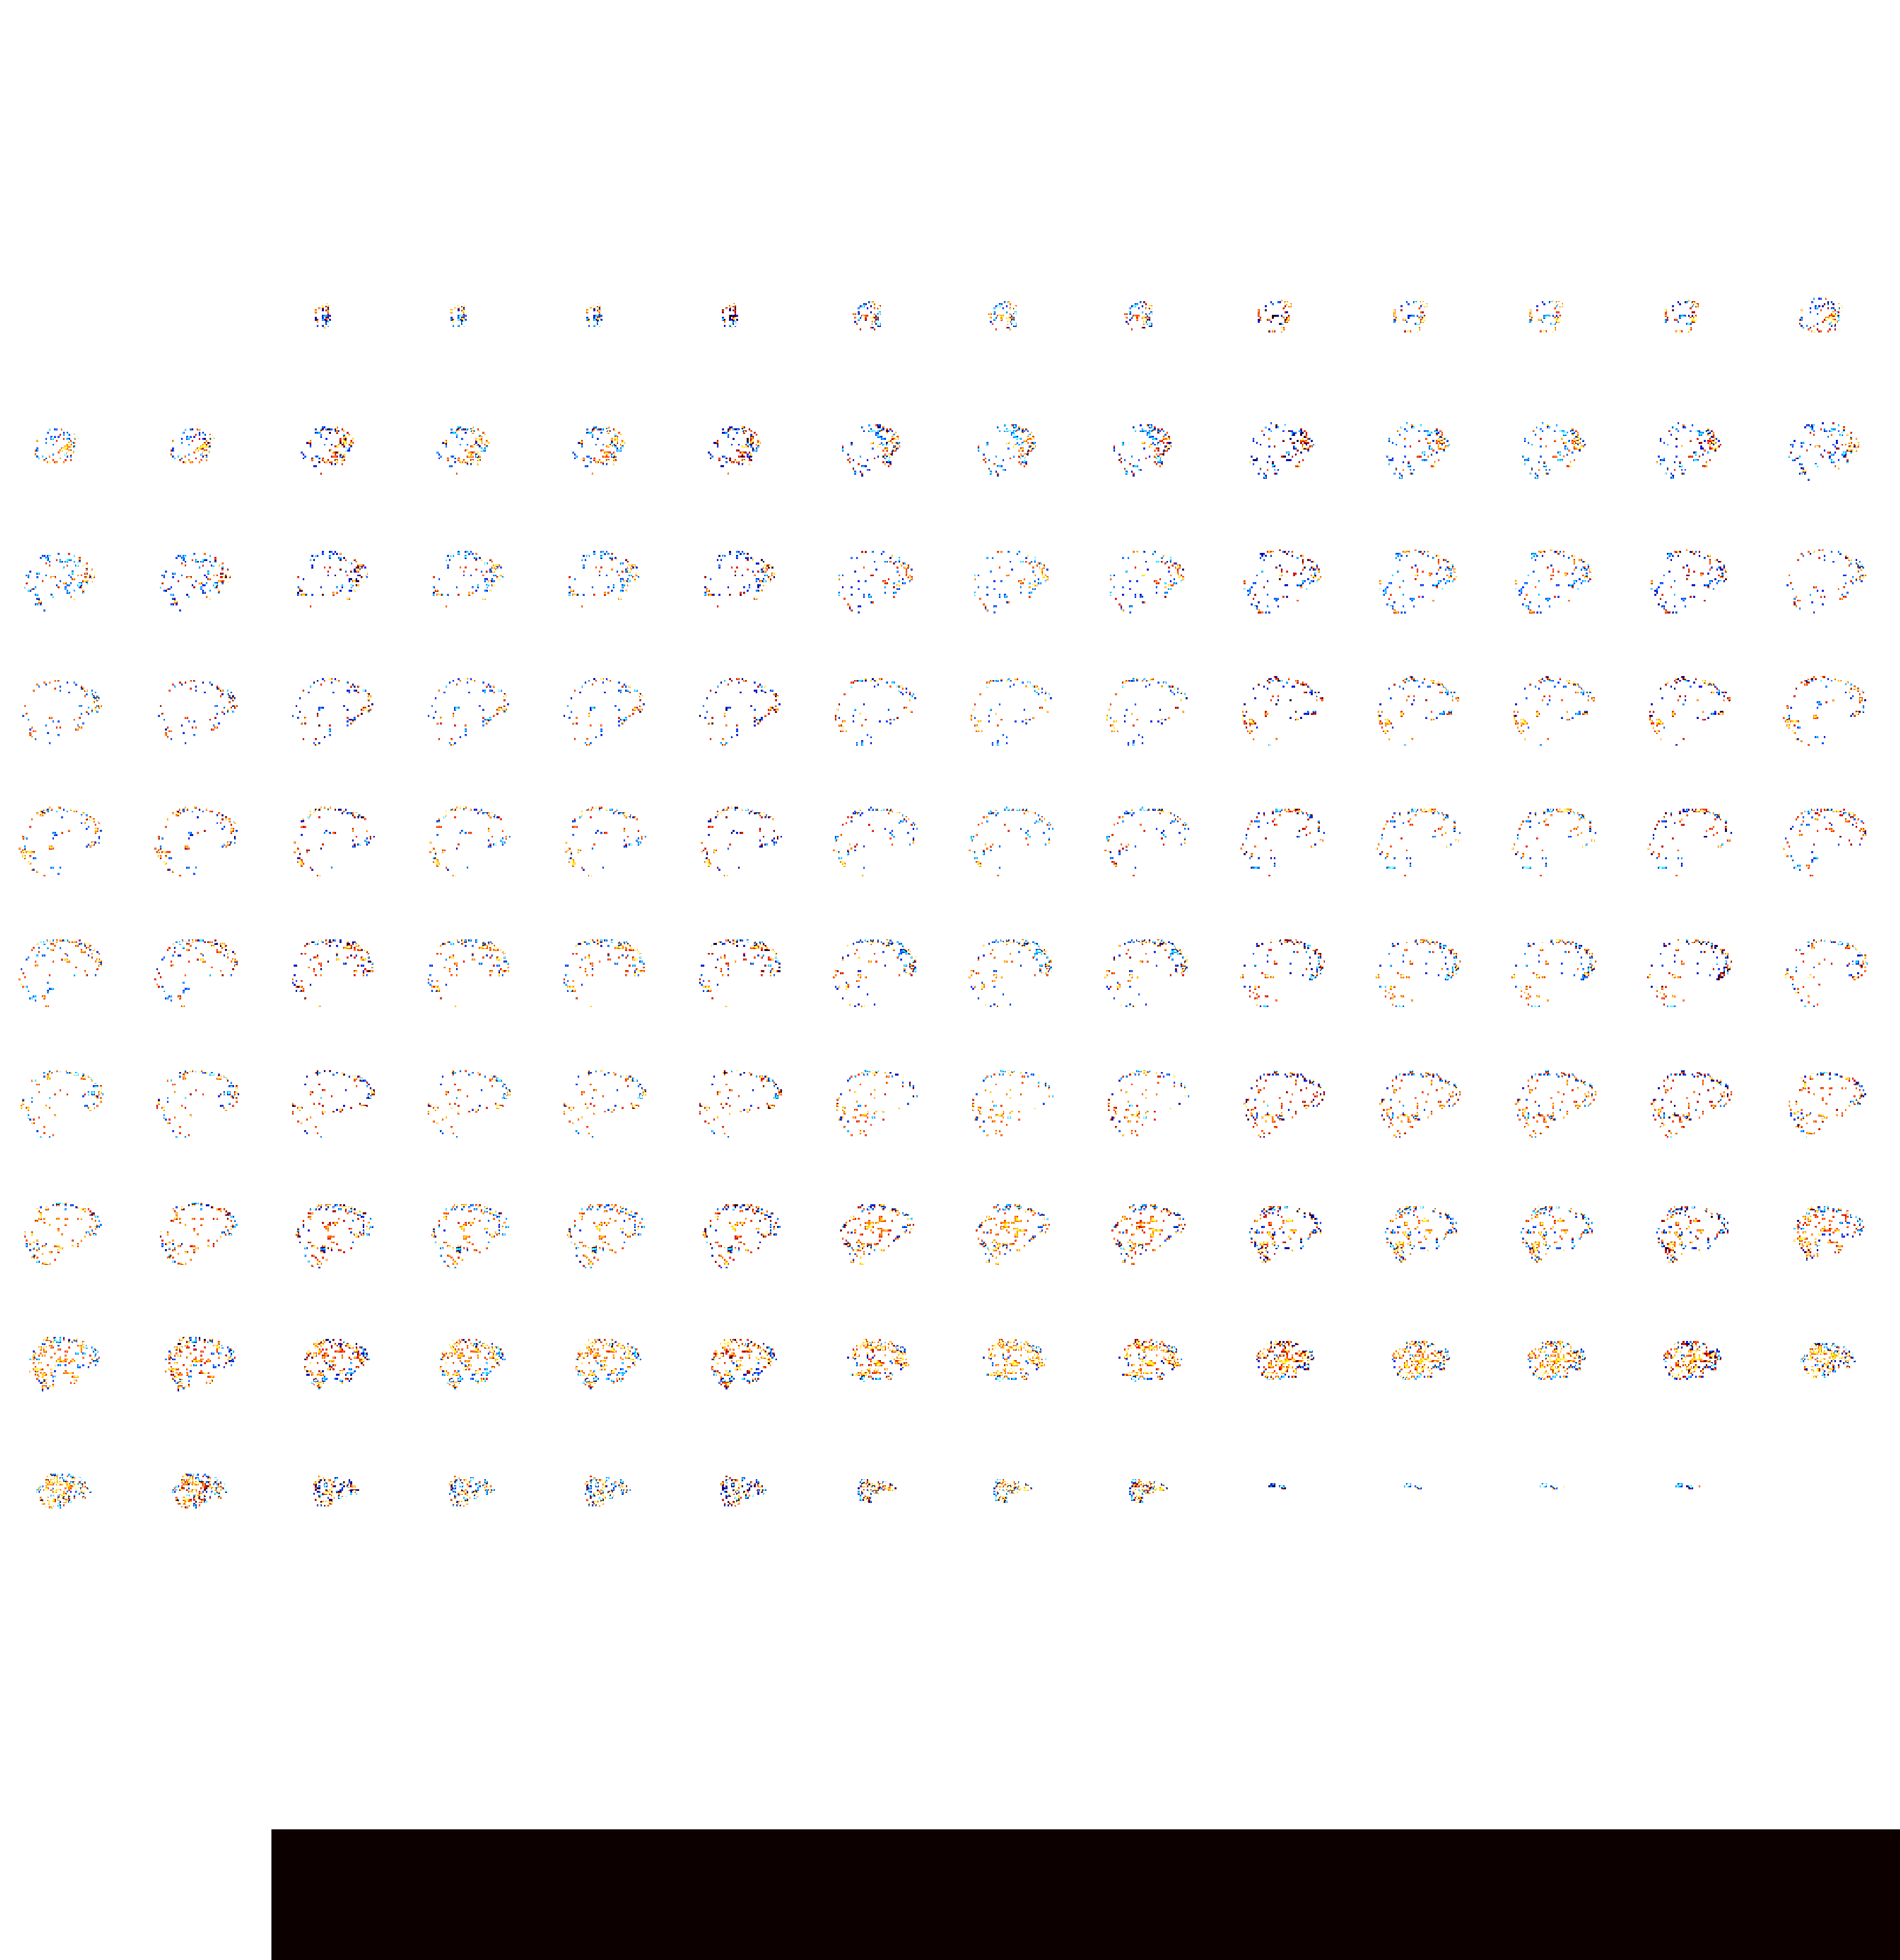

In [28]:
# interactive
html_view = plotting.view_img(volume, bg_img=anatimg, threshold=2, vmax=4, cut_coords=[-42, -16, 52], title="")
plt.show()

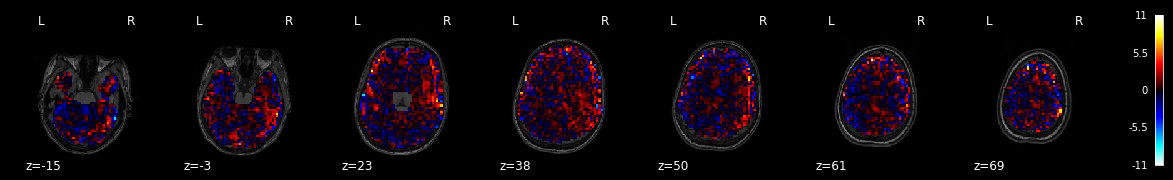

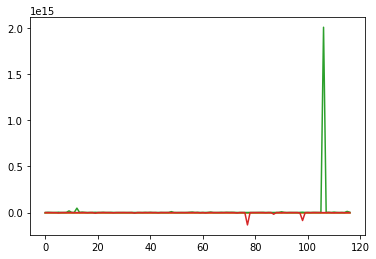

In [56]:
img_z = plotting.plot_stat_map(volume, bg_img=anatimg, display_mode='z')
plt.show()

# frequency of IC
ic_file = '/LOCAL/jzerbe/temp_results/melodic/sub-08_task-effort_space-T1w_melodic/melodic_ICstats'
ic = np.loadtxt(ic_file)
plt.plot(ic)